# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# import json library to make data scriptable for calculations
import json
# Fetch current BTC price
btc_price = requests.get(btc_url).json()

# isolate the canadian equivalent cost to purchase 1 BTC
cadbtc = btc_price["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()

# isolate the canadian equivalent cost to purchase 1 ETH
cadeth = eth_price["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = float(my_btc * cadbtc)
my_eth_value = float(my_eth * cadeth)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $19296.01
The current value of your 5.3 ETH is $2643.98


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares and bonds
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-20", tz="America/Toronto").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
2020-10-20 00:00:00-04:00  117.7  117.71  117.58  117.64  3624855  343.46   

                                                             
                             high     low   close    volume  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34  48206853

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $343.34


In [10]:
# Compute the current value of shares
my_spy_value = float(my_spy * spy_close_price)
my_agg_value = float(my_agg * agg_close_price)
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17167.00
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(columns = ["amount"], index = ["crypto", "shares"])

df_savings["amount"]["crypto"] = my_btc_value + my_eth_value
df_savings["amount"]["shares"] = my_spy_value + my_agg_value

# Display savings DataFrame
display(df_savings)

,amount
crypto,21940
shares,40695


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3076d0130>],
      dtype=object)

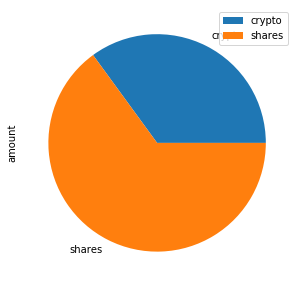

In [12]:
# Plot savings pie chart
df_savings.plot.pie(subplots = True, figsize=(5,5))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"]["crypto"] + df_savings["amount"]["shares"]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")
else:
    print(f"You have almost reach your emergency fund goal. You are only ${(emergency_fund - total_savings):0.2f} away.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-20', tz='America/Toronto').isoformat()
end_date = pd.Timestamp('2020-10-20', tz='America/Toronto').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562  202.85   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   

                                                                
                             high       low   close     volume  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.3000  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.5600  206.97   51484043

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30yrs.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006930,1.012426,0.996507,1.013421,0.997283,0.996120,1.009572,1.002190,1.001785,0.999481,...,1.000799,0.996543,1.008728,1.001179,1.019894,0.993438,0.992825,1.002076,1.002031,0.993597
2,0.998209,1.012548,1.002254,1.018067,1.000916,1.001665,1.004878,0.998301,0.996325,0.999287,...,0.994813,0.996140,1.009893,0.997138,1.022953,0.991841,0.995869,0.996353,1.007806,0.999358
3,1.004773,1.008069,0.990551,1.019861,1.003517,1.004409,1.004947,1.015236,0.992094,1.010974,...,0.995362,0.993295,1.012202,1.007596,1.027634,0.990879,1.003373,1.013631,1.002758,0.996788
4,1.002079,1.012177,0.984538,1.025768,0.999715,1.014402,1.009279,1.010547,0.993140,1.003794,...,0.992128,0.988781,1.009238,1.008517,1.018281,0.992550,1.007472,1.017222,0.996028,0.980082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.881997,9.760290,8.981458,7.481650,9.412538,7.738568,12.625275,25.205688,17.055253,6.773063,...,4.710054,6.340094,6.709457,17.692936,7.266516,5.198695,11.752368,1.436817,10.878242,9.697640
7557,6.820146,9.694031,8.941494,7.600768,9.419181,7.732867,12.783553,25.272329,17.195654,6.802888,...,4.708045,6.392459,6.679692,17.653515,7.282124,5.165232,11.734121,1.446508,10.969567,9.652634
7558,6.924680,9.655670,8.876546,7.627819,9.446253,7.708306,12.812119,25.522177,16.975209,6.893684,...,4.750084,6.423733,6.684994,17.693393,7.306595,5.101844,12.003004,1.441391,10.947453,9.590738
7559,6.831824,9.544022,8.788530,7.644633,9.409040,7.715126,12.809193,25.557967,17.007693,6.807478,...,4.667597,6.413928,6.671988,17.685692,7.223237,5.118209,12.123906,1.455957,11.025249,9.565652


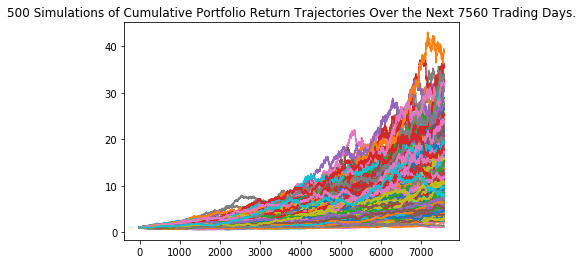

In [19]:
# Plot simulation outcomes
mc_sim_line_plot = MC_30yrs.plot_simulation()

# save plot for future use
mc_sim_line_plot.get_figure().savefig("MC_30yrs_sim_plot.png", bbox_inches="tight")

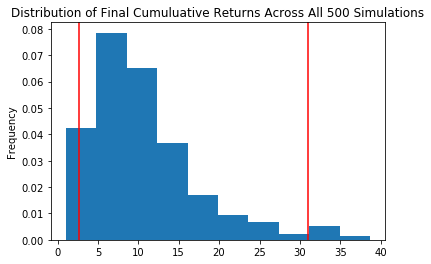

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yrs.plot_distribution()

# save plot for future use
dist_plot.get_figure().savefig('MC_30yrs_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_sim_stats = MC_30yrs.summarize_cumulative_return()

# Print summary statistics
print(mc_sim_stats)

count           500.000000
mean             10.720295
std               6.824164
min               1.020744
25%               5.974233
50%               9.260723
75%              13.971649
max              38.696704
95% CI Lower      2.606291
95% CI Upper     30.984814
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_sim_stats[8]*initial_investment,2)
ci_upper = round(mc_sim_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52125.81 and $619696.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_sim_stats[8]*initial_investment,2)
ci_upper = round(mc_sim_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $78188.72 and $929544.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, amend weight 5% bonds (AGG) and 95% stock (SPY)
MC_5yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.05,0.95],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004397,1.002518,1.004734,0.999889,1.008100,1.003540,0.984744,0.987967,1.011577,0.995682,...,0.986052,0.991584,0.996546,1.003219,1.004141,1.004909,1.008102,1.014150,1.007746,0.991742
2,1.013774,1.004911,1.026626,0.983801,1.034525,0.991554,0.986712,0.987148,1.008415,1.024808,...,0.993316,1.003043,1.010648,0.983066,1.011418,1.021388,0.998351,1.009721,0.999175,0.989614
3,1.000686,0.992047,1.027685,0.962584,1.030309,0.990866,1.009000,0.981924,1.009365,1.027790,...,0.971656,0.999541,0.992514,0.989308,1.013693,1.010801,0.990210,1.009493,1.006495,0.990514
4,1.007636,0.995167,1.033233,0.959470,1.035157,0.998581,1.019422,0.968909,1.037029,1.026006,...,0.981889,1.018940,0.987427,1.004496,1.050878,0.995380,0.993108,1.009170,1.014593,0.973744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.469815,1.069424,2.240688,1.246031,1.062204,2.792340,3.032194,0.705164,1.377908,1.253519,...,3.380820,0.812259,0.720495,3.048999,1.242263,3.757977,1.418820,1.525281,1.500955,2.254941
1257,1.488226,1.061320,2.246772,1.216265,1.063434,2.833044,3.035548,0.694946,1.358068,1.246572,...,3.437559,0.816988,0.719845,3.081284,1.246107,3.744814,1.437350,1.497379,1.520011,2.231772
1258,1.481917,1.063606,2.232124,1.208548,1.092402,2.807624,3.034298,0.697243,1.360893,1.281142,...,3.445520,0.810706,0.720566,3.058078,1.238937,3.811357,1.408231,1.489632,1.531618,2.237455
1259,1.506091,1.065392,2.249096,1.205983,1.126243,2.781523,3.066940,0.701065,1.381767,1.287360,...,3.445598,0.807639,0.726453,3.054818,1.225402,3.831395,1.416461,1.467251,1.551284,2.241109


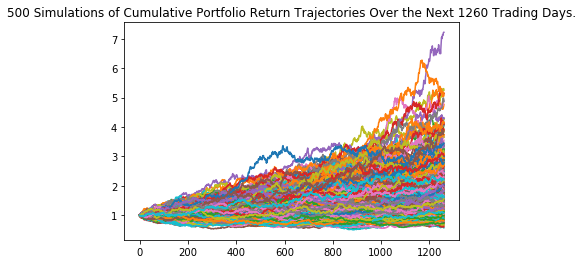

In [26]:
# Plot simulation outcomes
mc_5yr_sim_line_plot = MC_5yrs.plot_simulation()

# save plot for future use
mc_5yr_sim_line_plot.get_figure().savefig("MC_5yrs_sim_plot.png", bbox_inches="tight")

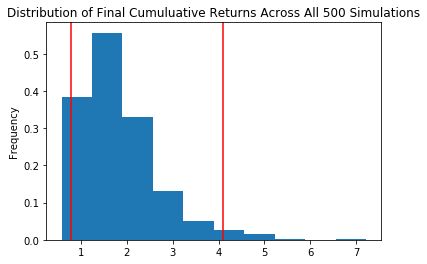

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5yrs.plot_distribution()

# save plot for future use
dist_plot_5yr.get_figure().savefig('MC_5yrs_dist_plot.png',bbox_inches='tight')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_5yrs_sim_stats = MC_5yrs.summarize_cumulative_return()

# Print summary statistics
print(mc_5yrs_sim_stats)

count           500.000000
mean              1.833339
std               0.852724
min               0.573236
25%               1.227305
50%               1.634145
75%               2.219815
max               7.218021
95% CI Lower      0.781703
95% CI Upper      4.086656
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc_5yrs_sim_stats[8]*initial_investment,2)
ci_upper_five = round(mc_5yrs_sim_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46902.19 and $245199.34


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns, with 20% weight for bonds (AGG) and 80% weight for stocks (SPY)
MC_10yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2,0.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996707,0.985034,1.008576,0.995329,1.000071,1.000229,1.017976,1.003919,1.002506,1.006981,...,1.001016,1.000659,0.995710,1.001783,1.006567,1.007754,0.998130,1.006278,0.988542,1.007194
2,0.993217,1.003434,0.991791,0.998408,0.996872,1.010913,1.035025,1.011891,1.001607,1.020297,...,0.984435,1.002285,1.013087,1.003847,0.994713,1.008867,0.986103,1.008321,1.007706,1.013124
3,0.994731,1.006263,1.001000,0.984756,1.011808,1.011360,1.040617,0.997540,0.996675,1.017436,...,0.984593,0.989067,1.017391,0.993262,0.988713,1.015753,0.981480,1.003262,1.020626,1.007177
4,1.004431,1.003246,1.005329,0.989143,1.019225,1.007329,1.045603,1.011181,1.000890,1.017479,...,0.990057,0.989749,1.016041,0.999973,0.994036,0.998169,0.995211,1.007562,1.021713,1.017160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.128234,2.569140,1.961096,2.089631,1.335084,1.112052,3.725242,5.070584,1.303921,3.160017,...,2.065991,3.640254,0.976197,4.023223,1.600774,2.244558,4.034906,2.175444,1.460397,4.153381
2517,4.106632,2.573406,1.937341,2.099809,1.334717,1.115599,3.729913,5.092497,1.298692,3.158362,...,2.048865,3.688010,1.003157,4.121133,1.605055,2.248021,4.025688,2.170515,1.459979,4.105146
2518,4.103260,2.589686,1.927038,2.092869,1.342961,1.137580,3.728941,5.093206,1.284214,3.207782,...,2.065487,3.662645,1.002855,4.108900,1.594075,2.248536,4.002021,2.146306,1.481425,4.144437
2519,4.107464,2.589558,1.913099,2.088293,1.344347,1.142739,3.734028,5.099639,1.300892,3.234027,...,2.057241,3.660507,0.995880,4.098977,1.603808,2.267965,3.934428,2.147696,1.491784,4.090421


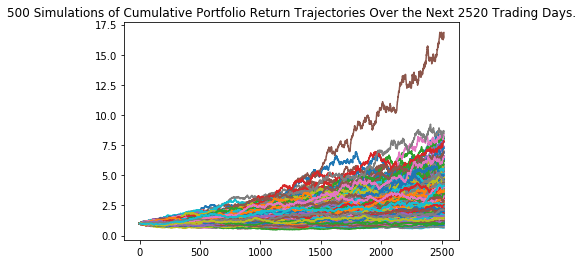

In [32]:
# Plot simulation outcomes
mc_10yr_sim_line_plot = MC_10yrs.plot_simulation()

# save plot for future use
mc_10yr_sim_line_plot.get_figure().savefig("MC_10yrs_sim_plot.png", bbox_inches="tight")

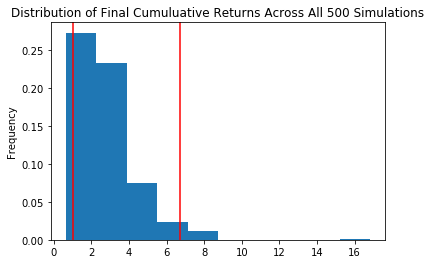

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10yrs.plot_distribution()

# save plot for future use
dist_plot_10yr.get_figure().savefig('MC_10yrs_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_10yrs_sim_stats = MC_10yrs.summarize_cumulative_return()

# Print summary statistics
print(mc_10yrs_sim_stats)

count           500.000000
mean              2.793456
std               1.545424
min               0.636236
25%               1.780654
50%               2.431132
75%               3.429733
max              16.829597
95% CI Lower      1.013261
95% CI Upper      6.699689
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_10yrs_sim_stats[8]*initial_investment,2)
ci_upper_ten = round(mc_10yrs_sim_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $60795.67 and $401981.35
